Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting (use %matplotlib inline).

Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#ensure all charts/graphs show in notebook
%matplotlib inline 
# To install imbalanced-learn library use pip install imbalanced-learn command
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split #split data
from sklearn.tree import DecisionTreeClassifier #use if-else rules
from sklearn.linear_model import LogisticRegression #line that separates yes/no
from sklearn.neural_network import MLPClassifier #learns deeper patterns using multiple layers of neurons
from sklearn.metrics import classification_report #summarize model performance
from sklearn.metrics import roc_curve, auc #measure how well our model will separate churn v no churn
from sklearn import metrics #general metrics
from sklearn.metrics import confusion_matrix #check how many were predicted correctly v incorrectly
from  sklearn.preprocessing import StandardScaler #resize data for better predicting
from sklearn.metrics import precision_recall_curve, average_precision_score #precision recall gives usdata to drive p/r curve,  avg p score give us 1 # to summarize how good the curve is
import pandas as pd #working w/data tables
import matplotlib.pyplot as plt


df = pd.read_csv('customer_churn_telcom.csv', index_col = [0]) #load csv
df2 = pd.read_csv('customer_churn_telcom.csv', index_col = [0]) #load csv
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Classification (20 points)

In this question, we will build a classifier for predicting customer churn. Use the data given in the file named `customer_churn_telcom.csv` to build the model.

### i). Data Preprocessing (4 points)
 Before starting to build the model, we need to pre-process the data by performing following steps:


In [3]:
#(a)
#replace longer no values w/simple no.
df.replace(["No phone service", "no phone service", "No internet service", "no internet service"], "No", inplace=True)

#(b)
#covert yes/no to 1 & 0 
df = df.replace({"Yes": 1, "No": 0}).infer_objects(copy=False)


#(c)
#convert female/male to 1 & 0 & infer objects to ensure all columns have correct types.
df = df.replace({"Female": 1, "Male": 0}).infer_objects(copy=False)

#(d)
#one hote encoding on the 3 columns requested & infer objects to ensure all columns have correct types.
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"])

#(e)
#define target column
target = "Churn"

#separate features & target
x = df.drop(columns=[target]) #everything except churn
y = df[target] #just the churn column

#split 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=15, stratify=y)

#one more time 
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train, y_train, test_size=.2, random_state=15, stratify=y_train)

/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_87712/254435227.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0}).infer_objects(copy=False)
/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_87712/254435227.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Female": 1, "Male": 0}).infer_objects(copy=False)


### ii) Build Classifiers 

 

In [1]:
#(2a) 
#Train a decision tree classifier
dt_model = DecisionTreeClassifier(random_state = 15)
dt_model.fit(x_train_final, y_train_final) 

#Scale data for LR & MLP
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_final)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform (x_test)

#Train a logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=15)
log_model.fit(x_train_scaled, y_train_final)

#train a MLP classifier (Neural Network)
mlp_model = MLPClassifier(max_iter = 750, random_state=15)
mlp_model.fit(x_train_scaled, y_train_final)

#evaluate the models using classification reports
def evaluate_model(model, x_val_input, x_test_input, model_name):
    print(f"\n{model_name} - Validation Set")
    print(classification_report(y_val, model.predict(x_val_input)))
    print(f"\n{model_name} - Test Set")
    print(classification_report(y_test, model.predict(x_test_input)))

#print classification reports for each model
evaluate_model(dt_model, x_val, x_test, "Decision Tree")
evaluate_model(log_model, x_val_scaled, x_test_scaled, "Logistic Regression")
evaluate_model(mlp_model, x_val_scaled, x_test_scaled, "MLP Classifier")

NameError: name 'DecisionTreeClassifier' is not defined

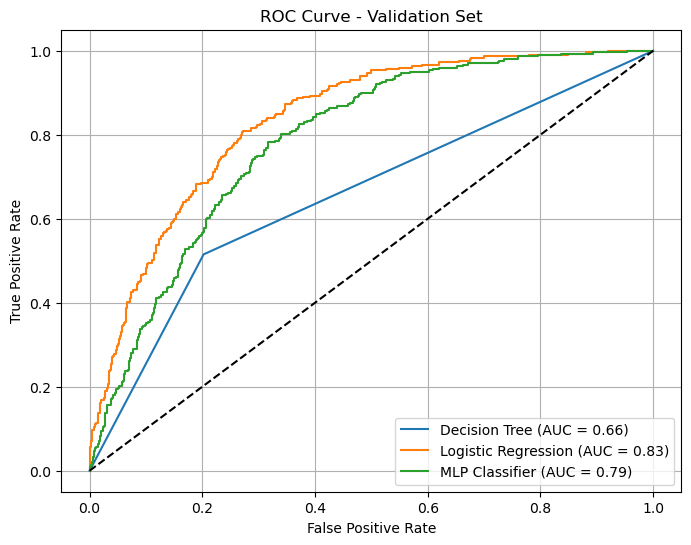

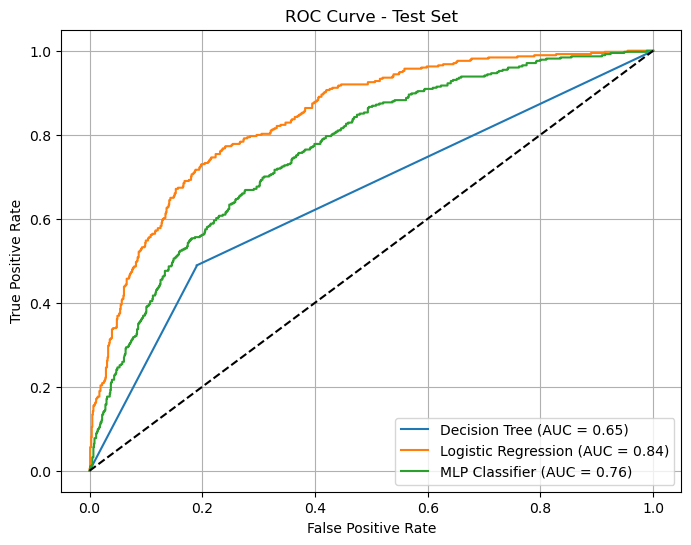

In [5]:
#(2b)
#get probability scores for each model

#decision tree
val_dt_probs = dt_model.predict_proba(x_val)[:,1]
test_dt_probs= dt_model.predict_proba(x_test)[:,1]

#logistic regression
val_log_probs = log_model.predict_proba(x_val_scaled)[:,1]
test_log_probs = log_model.predict_proba(x_test_scaled)[:,1]

#MLP classifier
val_mlp_probs = mlp_model.predict_proba(x_val_scaled)[:,1]
test_mlp_probs = mlp_model.predict_proba(x_test_scaled)[:,1]

#compute FPR, TPR, AUC for each model
def get_roc(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

#validation ROC
val_dt_fpr, val_dt_tpr, val_dt_auc = get_roc(y_val, val_dt_probs)
val_log_fpr, val_log_tpr, val_log_auc = get_roc(y_val, val_log_probs)
val_mlp_fpr, val_mlp_tpr, val_mlp_auc = get_roc(y_val, val_mlp_probs)

#test ROC
test_dt_fpr, test_dt_tpr, test_dt_auc = get_roc(y_test, test_dt_probs)
test_log_fpr, test_log_tpr, test_log_auc = get_roc(y_test, test_log_probs)
test_mlp_fpr, test_mlp_tpr, test_mlp_auc = get_roc(y_test, test_mlp_probs)

# plot ROC curves for val set
plt.figure(figsize=(8, 6))
plt.plot(val_dt_fpr, val_dt_tpr, label=f'Decision Tree (AUC = {val_dt_auc:.2f})')
plt.plot(val_log_fpr, val_log_tpr, label=f'Logistic Regression (AUC = {val_log_auc:.2f})')
plt.plot(val_mlp_fpr, val_mlp_tpr, label=f'MLP Classifier (AUC = {val_mlp_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#plot ROC curves for test set
plt.figure(figsize=(8, 6))
plt.plot(test_dt_fpr, test_dt_tpr, label=f'Decision Tree (AUC = {test_dt_auc:.2f})')
plt.plot(test_log_fpr, test_log_tpr, label=f'Logistic Regression (AUC = {test_log_auc:.2f})')
plt.plot(test_mlp_fpr, test_mlp_tpr, label=f'MLP Classifier (AUC = {test_mlp_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

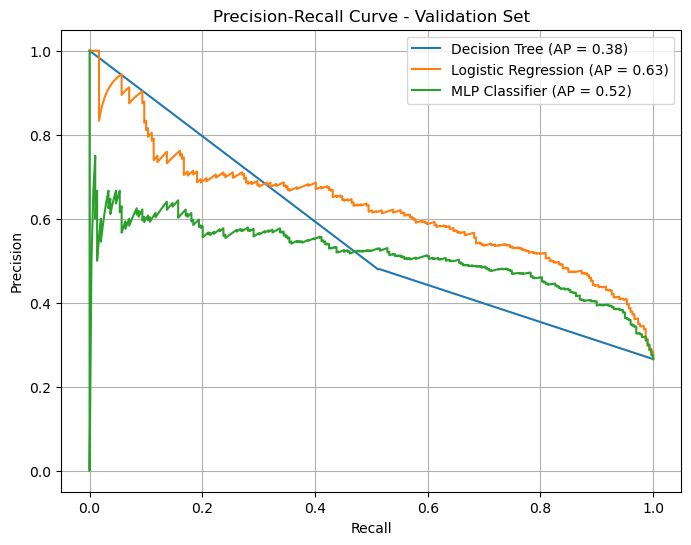

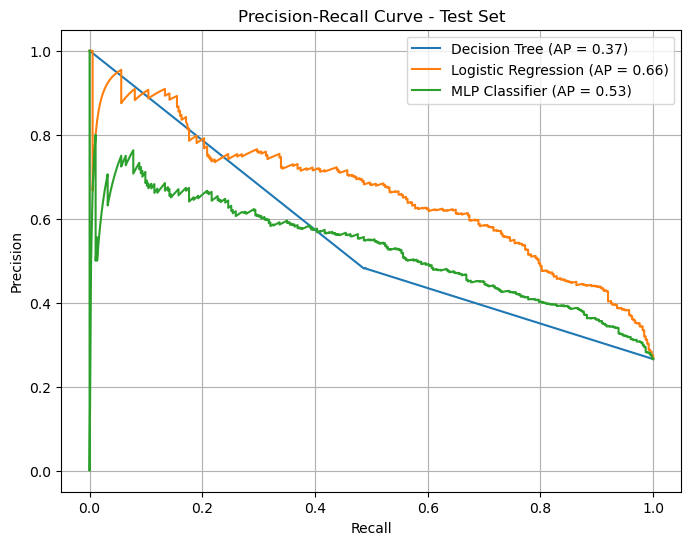

In [6]:
#2(c)
#get predicted probabilities again

#decision tree
val_dt_probs = dt_model.predict_proba(x_val)[:, 1]
test_dt_probs = dt_model.predict_proba(x_test)[:, 1]

#lLogistic regression (scaled)
val_log_probs = log_model.predict_proba(x_val_scaled)[:, 1]
test_log_probs = log_model.predict_proba(x_test_scaled)[:, 1]

#MLP Classifier (scaled)
val_mlp_probs = mlp_model.predict_proba(x_val_scaled)[:, 1]
test_mlp_probs = mlp_model.predict_proba(x_test_scaled)[:, 1]

#funct to get PR curve values
def get_pr(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    avg_precision = average_precision_score(y_true, y_scores)
    return precision, recall, avg_precision

#validation
val_dt_prec, val_dt_rec, val_dt_ap = get_pr(y_val, val_dt_probs)
val_log_prec, val_log_rec, val_log_ap = get_pr(y_val, val_log_probs)
val_mlp_prec, val_mlp_rec, val_mlp_ap = get_pr(y_val, val_mlp_probs)

#test
test_dt_prec, test_dt_rec, test_dt_ap = get_pr(y_test, test_dt_probs)
test_log_prec, test_log_rec, test_log_ap = get_pr(y_test, test_log_probs)
test_mlp_prec, test_mlp_rec, test_mlp_ap = get_pr(y_test, test_mlp_probs)

#plot PR curves for validation set
plt.figure(figsize=(8, 6))
plt.plot(val_dt_rec, val_dt_prec, label=f'Decision Tree (AP = {val_dt_ap:.2f})')
plt.plot(val_log_rec, val_log_prec, label=f'Logistic Regression (AP = {val_log_ap:.2f})')
plt.plot(val_mlp_rec, val_mlp_prec, label=f'MLP Classifier (AP = {val_mlp_ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#plot PR curves for test set
plt.figure(figsize=(8, 6))
plt.plot(test_dt_rec, test_dt_prec, label=f'Decision Tree (AP = {test_dt_ap:.2f})')
plt.plot(test_log_rec, test_log_prec, label=f'Logistic Regression (AP = {test_log_ap:.2f})')
plt.plot(test_mlp_rec, test_mlp_prec, label=f'MLP Classifier (AP = {test_mlp_ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Set')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### iii). Handling Class Imbalance with SMOTE



In [7]:
#3(a)
#separate features & target
X = df.drop('Churn',axis = 'columns') 
y = df2['Churn']

#split into train/test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

#verify the class distribution in the training set
print("Training target distribution:\n", y_train.value_counts())

Training target distribution:
 Churn
No     4130
Yes    1495
Name: count, dtype: int64


In [8]:
#(3b)
#initialize smote w/random state
smote = SMOTE(random_state=15)

#apply SMOTE to traning data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#display class dist after applying smote
print("After SMOTE - Training target value counts:")
print(y_train_resampled.value_counts())

After SMOTE - Training target value counts:
Churn
No     4130
Yes    4130
Name: count, dtype: int64


In [9]:
#(3c)
#split updated training data
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_resampled, y_train_resampled,
    test_size=0.2,
    random_state=15,
    stratify=y_train_resampled
)

#verify class dist
print("Class distribution in the final training set:")
print(y_train_final.value_counts())

print("\nClass distribution in the validation set:")
print(y_val.value_counts())


Class distribution in the final training set:
Churn
Yes    3304
No     3304
Name: count, dtype: int64

Class distribution in the validation set:
Churn
Yes    826
No     826
Name: count, dtype: int64


### iv). Retraining the Classifiers (4 points)

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results.

In [10]:
#(4a)
#initialize the LR model
log_model = LogisticRegression(max_iter=5000, random_state=15)

#train the model on the SMOTE training data
log_model.fit(x_train_final, y_train_final)

#initialize the MLP Classifier
mlp_model = MLPClassifier(max_iter=500, random_state=15)

#train the model on the SMOTE training data
mlp_model.fit(x_train_final, y_train_final)



MLPClassifier(max_iter=500, random_state=15)

In [11]:
#(4b)
#predict the target values for the test set
y_test_pred_log = log_model.predict(x_test)
y_test_pred_mlp = mlp_model.predict(x_test)

#generate the classification report lr
log_classification_report = classification_report(y_test, y_test_pred_log)
#print 
print("Logistic Regression - Test Set Classification Report:\n")
print(log_classification_report)

#generate the classification report
mlp_classification_report = classification_report(y_test, y_test_pred_mlp)
#print 
print("MLP Classifier - Test Set Classification Report:\n")
print(mlp_classification_report)


Logistic Regression - Test Set Classification Report:

              precision    recall  f1-score   support

          No       0.87      0.84      0.85      1033
         Yes       0.60      0.64      0.62       374

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407

MLP Classifier - Test Set Classification Report:

              precision    recall  f1-score   support

          No       0.91      0.51      0.65      1033
         Yes       0.39      0.86      0.54       374

    accuracy                           0.60      1407
   macro avg       0.65      0.69      0.60      1407
weighted avg       0.77      0.60      0.62      1407



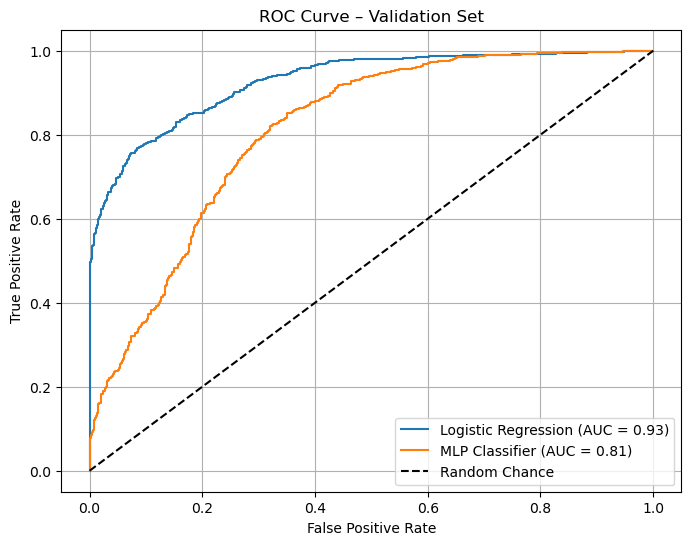

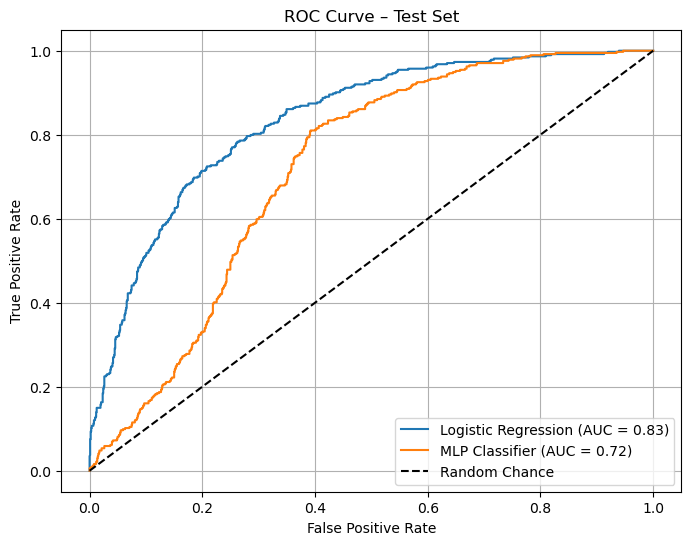

In [12]:
#(4c)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#convert y_val and y_test from 'Yes'/'No' to 1/0
y_val_binary = y_val.map({'No': 0, 'Yes': 1})
y_test_binary = y_test.map({'No': 0, 'Yes': 1})

#get predicted probabilities for the positive class
val_log_probs = log_model.predict_proba(x_val)[:, 1]
val_mlp_probs = mlp_model.predict_proba(x_val)[:, 1]
test_log_probs = log_model.predict_proba(x_test)[:, 1]
test_mlp_probs = mlp_model.predict_proba(x_test)[:, 1]

#ROC values – validation
val_log_fpr, val_log_tpr, _ = roc_curve(y_val_binary, val_log_probs)
val_log_auc = auc(val_log_fpr, val_log_tpr)

val_mlp_fpr, val_mlp_tpr, _ = roc_curve(y_val_binary, val_mlp_probs)
val_mlp_auc = auc(val_mlp_fpr, val_mlp_tpr)

#ROC values – test
test_log_fpr, test_log_tpr, _ = roc_curve(y_test_binary, test_log_probs)
test_log_auc = auc(test_log_fpr, test_log_tpr)

test_mlp_fpr, test_mlp_tpr, _ = roc_curve(y_test_binary, test_mlp_probs)
test_mlp_auc = auc(test_mlp_fpr, test_mlp_tpr)

#plot ROC – validation
plt.figure(figsize=(8, 6))
plt.plot(val_log_fpr, val_log_tpr, label=f'Logistic Regression (AUC = {val_log_auc:.2f})')
plt.plot(val_mlp_fpr, val_mlp_tpr, label=f'MLP Classifier (AUC = {val_mlp_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve – Validation Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#plot ROC – test
plt.figure(figsize=(8, 6))
plt.plot(test_log_fpr, test_log_tpr, label=f'Logistic Regression (AUC = {test_log_auc:.2f})')
plt.plot(test_mlp_fpr, test_mlp_tpr, label=f'MLP Classifier (AUC = {test_mlp_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve – Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



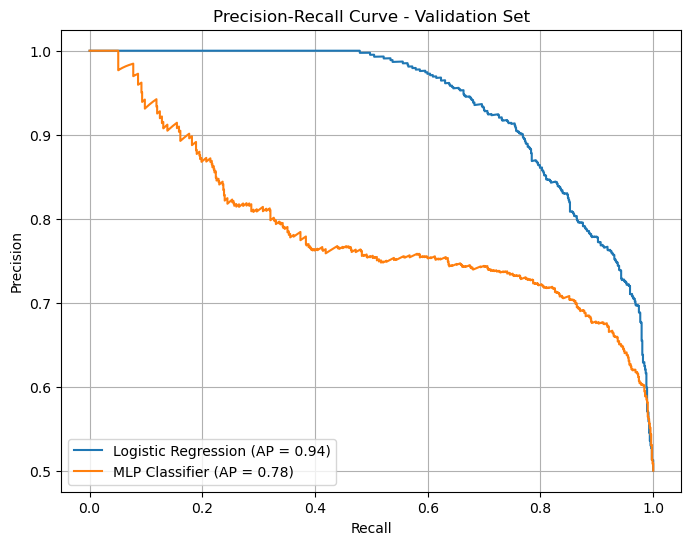

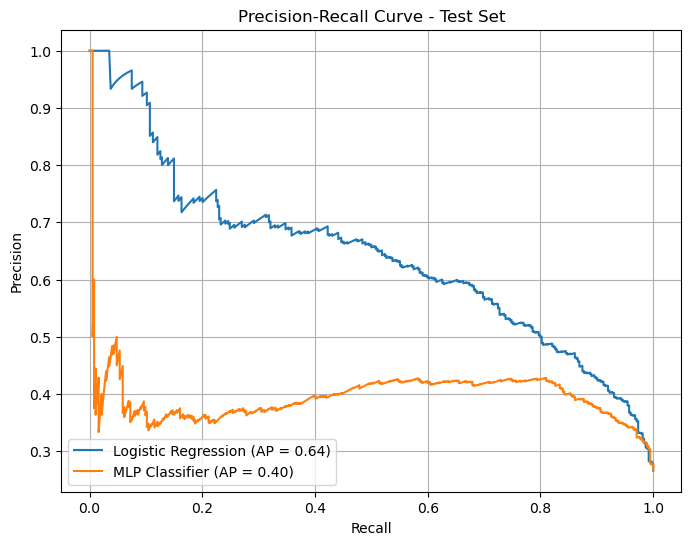

In [13]:
#(4d)
# Validation - PR Curve
val_precision_log, val_recall_log, _ = precision_recall_curve(y_val_binary, val_log_probs)
val_ap_log = average_precision_score(y_val_binary, val_log_probs)

val_precision_mlp, val_recall_mlp, _ = precision_recall_curve(y_val_binary, val_mlp_probs)
val_ap_mlp = average_precision_score(y_val_binary, val_mlp_probs)

# Test - PR Curve
test_precision_log, test_recall_log, _ = precision_recall_curve(y_test_binary, test_log_probs)
test_ap_log = average_precision_score(y_test_binary, test_log_probs)

test_precision_mlp, test_recall_mlp, _ = precision_recall_curve(y_test_binary, test_mlp_probs)
test_ap_mlp = average_precision_score(y_test_binary, test_mlp_probs)

plt.figure(figsize=(8, 6))
plt.plot(val_recall_log, val_precision_log, label=f'Logistic Regression (AP = {val_ap_log:.2f})')
plt.plot(val_recall_mlp, val_precision_mlp, label=f'MLP Classifier (AP = {val_ap_mlp:.2f})')
plt.title('Precision-Recall Curve - Validation Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(test_recall_log, test_precision_log, label=f'Logistic Regression (AP = {test_ap_log:.2f})')
plt.plot(test_recall_mlp, test_precision_mlp, label=f'MLP Classifier (AP = {test_ap_mlp:.2f})')
plt.title('Precision-Recall Curve - Test Set')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

